In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from math import log
from scipy.stats import pearsonr
from statsmodels.graphics.tsaplots import plot_acf
import datetime
import scipy
import warnings
import scipy.stats as st
import statsmodels as sm
import matplotlib
import matplotlib.mlab as mlab
from scipy.stats import norm
import math
import warnings
warnings.filterwarnings('ignore')

# Task 1:

In [199]:
df = pd.read_csv("https://www.dropbox.com/s/ygc83ncirh1cn94/spx_index.csv?dl=1")

# Task 2:

In [200]:
selected_security = "AMZN US Equity"

In [201]:
df_selected = df[df['SECURITY'] == selected_security]
df_selected['price'] = df_selected['PX_LAST']
cols = ['DATE', 'price']
df_s = df_selected[cols]
df_s = df_s.dropna()

In [202]:
X = df_s['price']

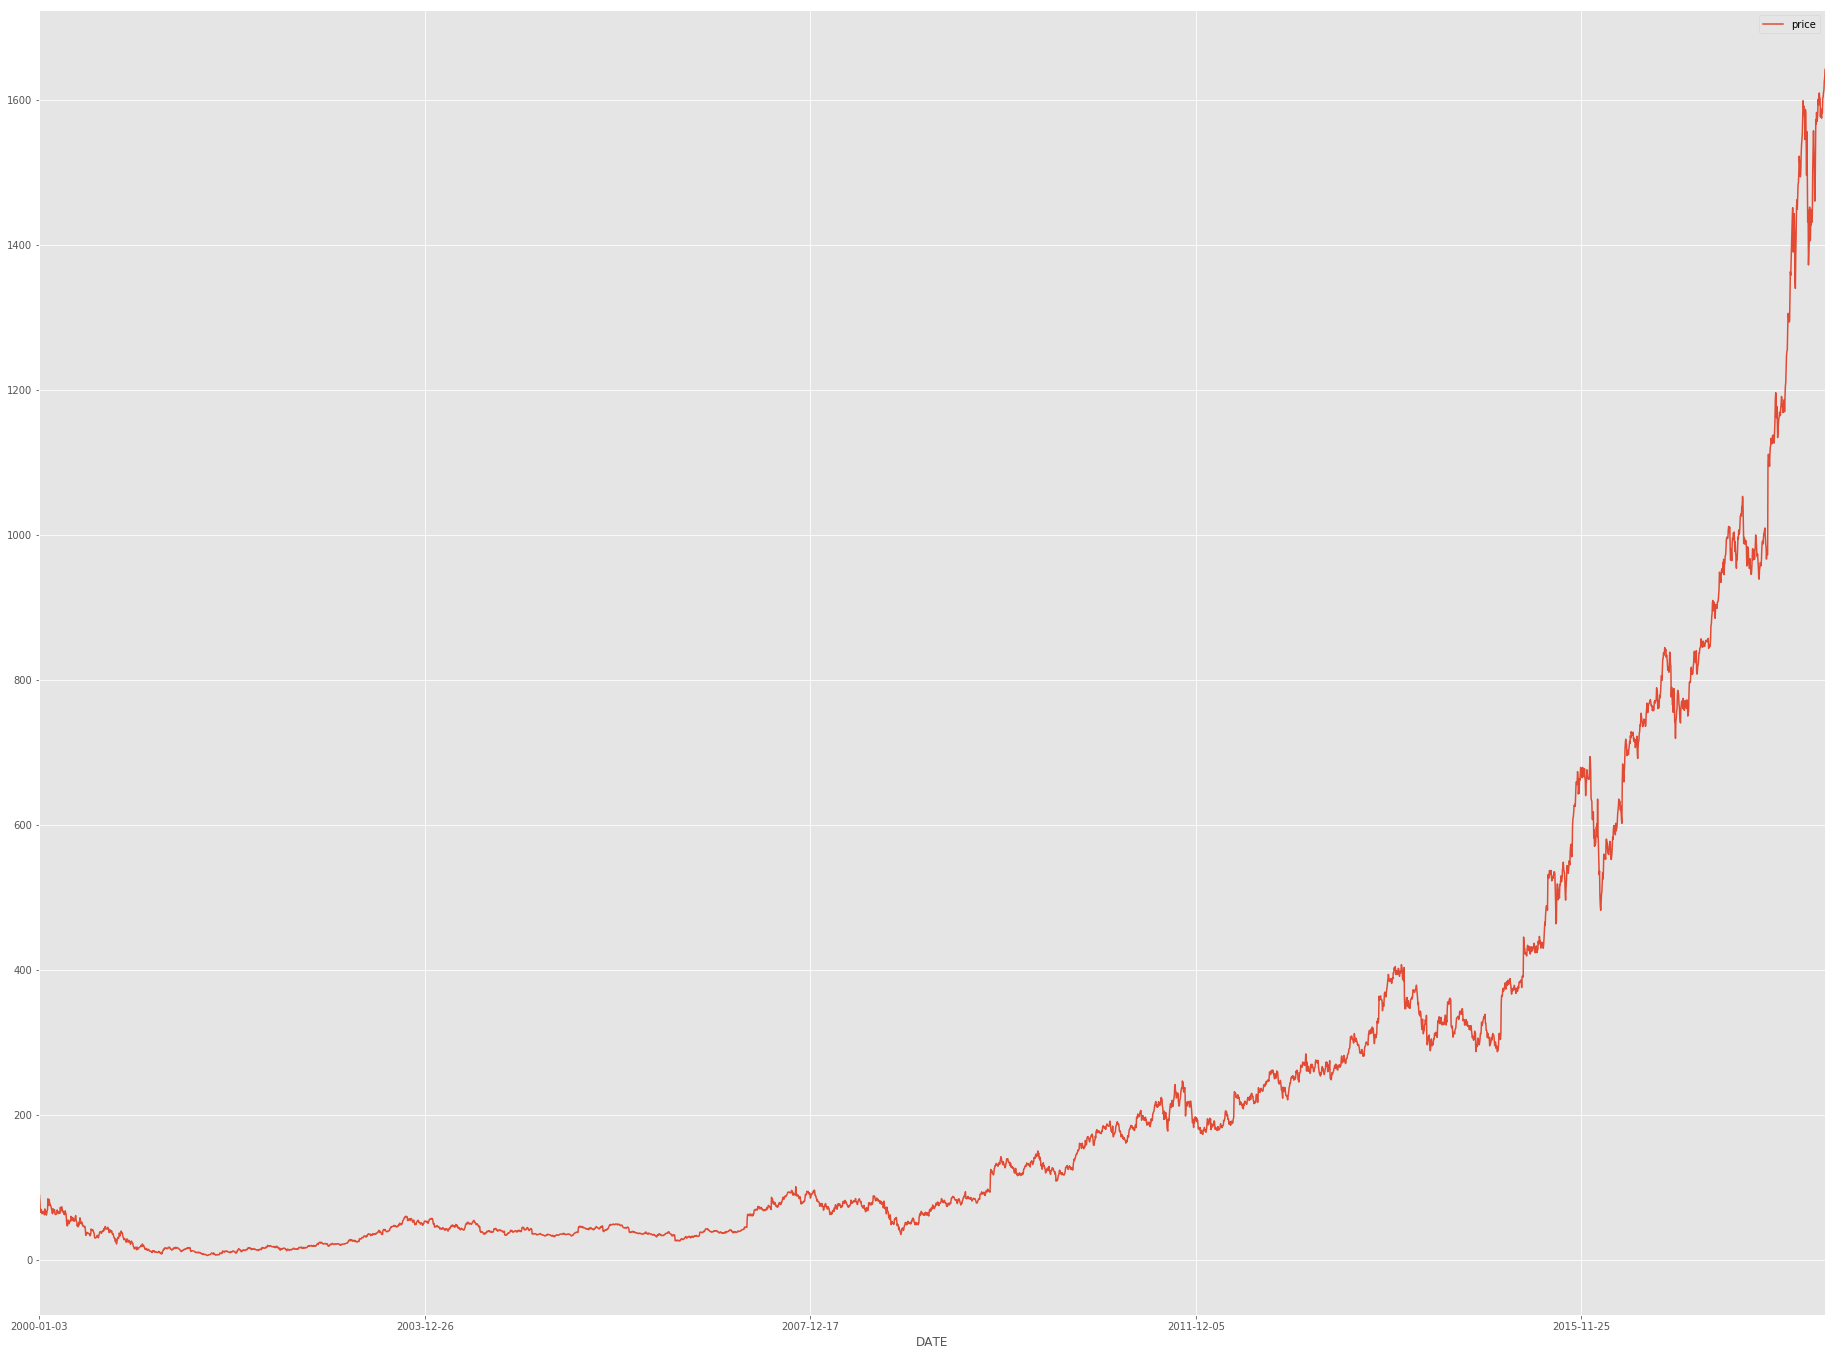

In [203]:
df_s.plot(x=df_s['DATE'])

Firstly, I divide sample into two groups and measure most common statistics.

In [204]:
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%.2f, mean2=%.2f' % (mean1, mean2))
print('variance1=%.2f, variance2=%.2f' % (var1, var2))

mean1=41.54, mean2=436.78
variance1=457.61, variance2=125941.85


Secondly, I  use augmented dickey-fuller test(ADF) and kwiatkowski–phillips–schmidt–shin(kpss)
test to check hypothesis of stationarity on prices and logged prices.

In [205]:
print("\n\tTESTS:")
#
res = kpss(X)
print('kpss Statistic: %.2f' % res[0])
print('p-value: %.2f' % res[1])
print('Critical Values:')
#So we can reject null hypothesis about stationarity with alpha 0.01
for key, value in res[3].items():
    print('\t%s: %.3f' % (key, value))
res = adfuller(X)
print('ADF Statistic: %.2f' % res[0])
print('p-value: %.2f' % res[1])
print('Critical Values:')
for key, value in res[4].items():
    print('\t%s: %.3f' % (key, value))
# so test suggests the TS has a unit root - non-stationary



	TESTS:
kpss Statistic: 9.26
p-value: 0.01
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
ADF Statistic: 6.76
p-value: 1.00
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


Both test suggest that time-series isn't stationary.

On logged data: 

In [206]:
X = df_s['price'].values
X = [log(i) for i in X]
plit = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = np.mean(X1), np.mean(X2)
var1, var2 = np.var(X1), np.var(X2)
print('mean1=%.4f, mean2=%.4f' % (mean1, mean2))
print('variance1=%.4f, variance2=%.4f' % (var1, var2))
print("\n\tTESTS:")

#
res = kpss(X)
print('kpss Statistic: %.2f' % res[0])
print('p-value: %.2f' % res[1])
print('Critical Values:')
#So we can reject null hypothesis about stationarity with alpha 0.01

for key, value in res[3].items():
    print('\t%s: %.3f' % (key, value))
res = adfuller(X)
print('ADF Statistic: %.2f' % res[0])
print('p-value: %.2f' % res[1])
print('Critical Values:')
for key, value in res[4].items():
    print('\t%s: %.3f' % (key, value))
# so test suggests the TS has a unit root - non-stationary

mean1=3.5683, mean2=5.7838
variance1=0.3646, variance2=0.5896

	TESTS:
kpss Statistic: 13.05
p-value: 0.01
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
ADF Statistic: 0.43
p-value: 0.98
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


Tests conclusion is the same, but mean and variance in 2 groups are closer this time.

Now let's look on returns

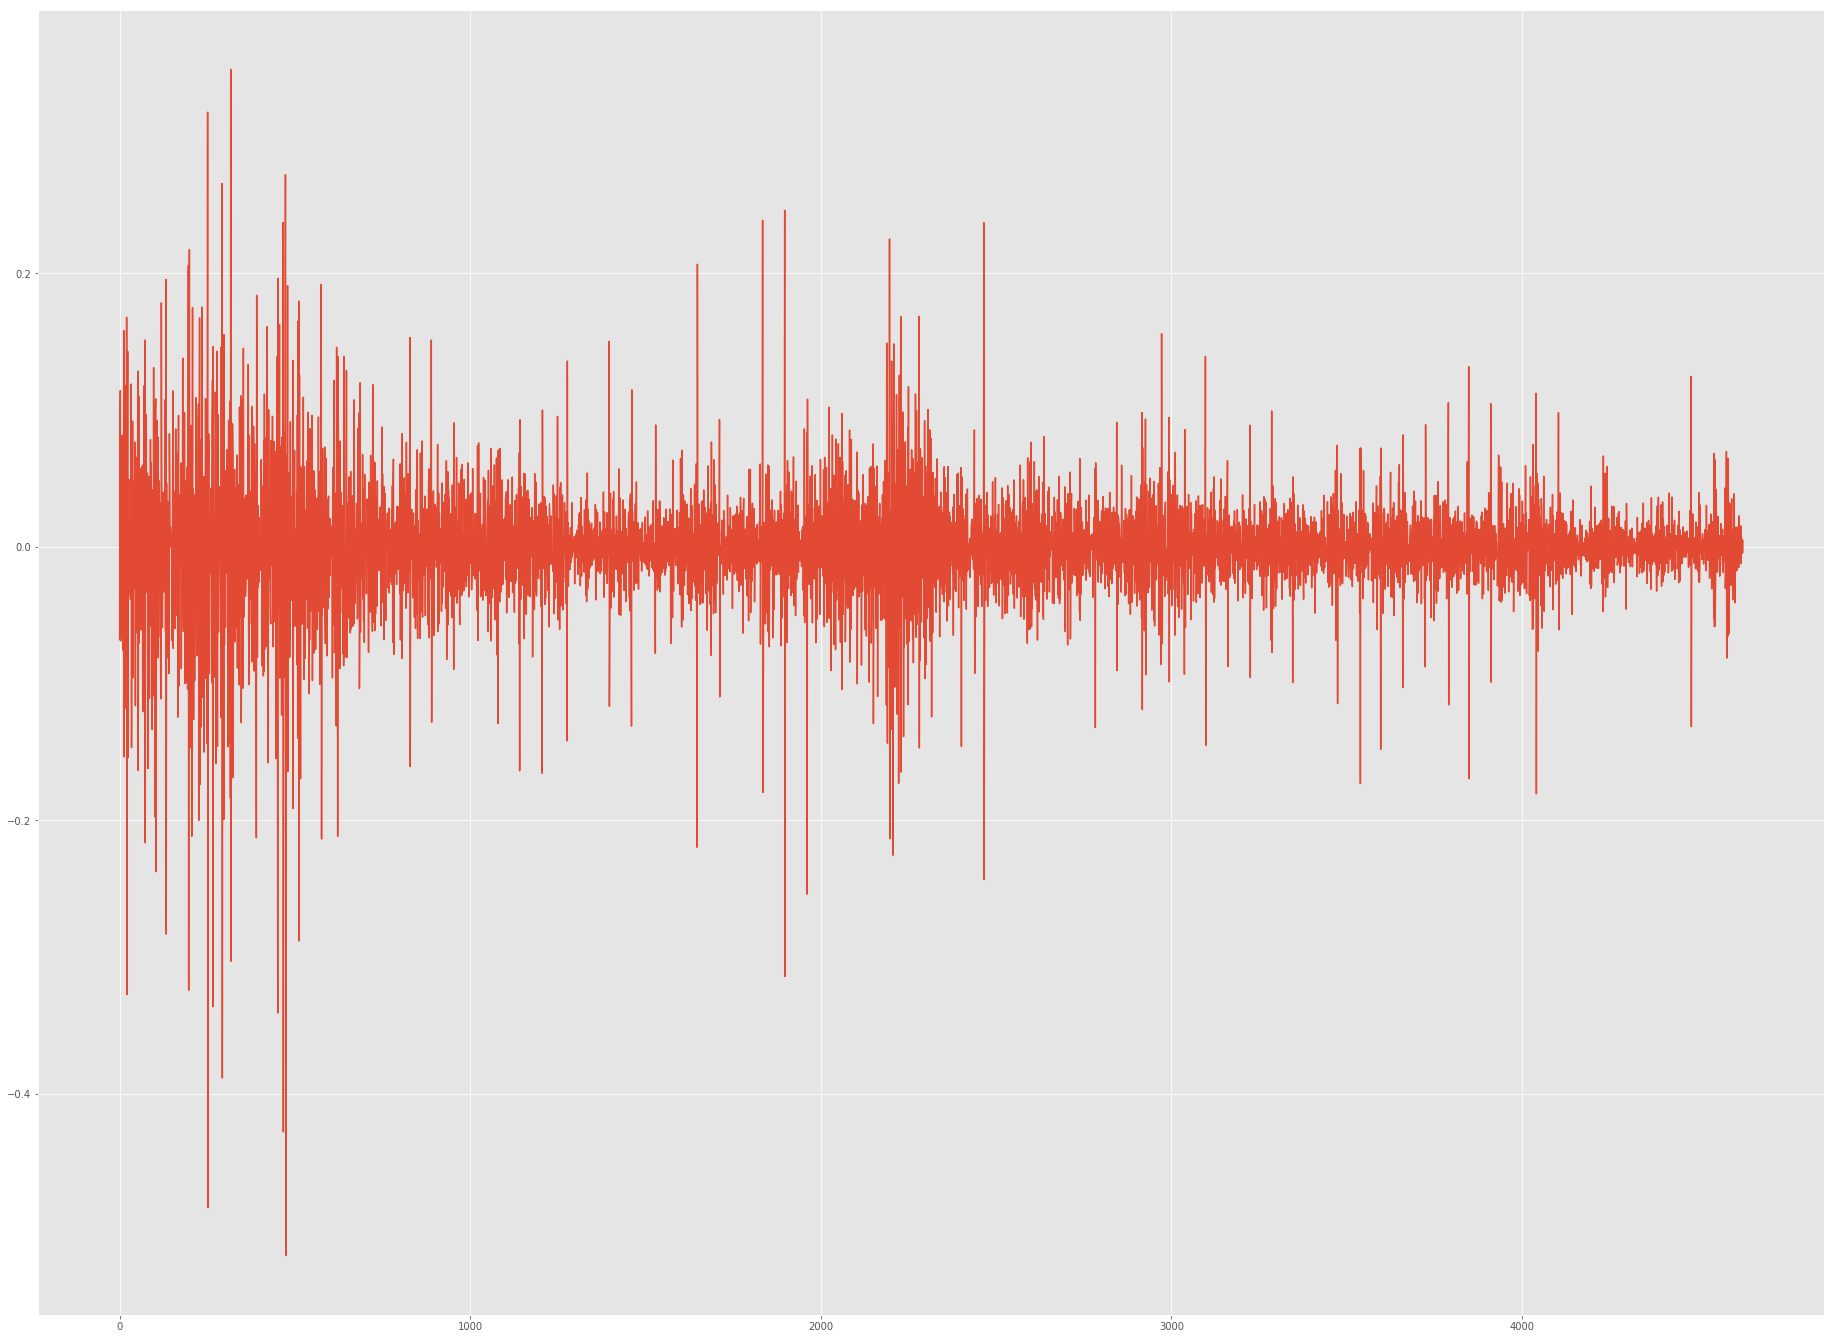

In [207]:
s = df_s['price']
s = s.pct_change().dropna()
s = s.diff()
s = s.dropna()
s = s.tolist()
s = [log(i+1) for i in s]
#from this plot we can see that volatility isnt consistent in time
plt.plot(s)

## Conclusion : 

Non-stationary : plot looks like non-stationary series, 
volatility and mean not consistent in time, all tests reject hypothesis of stationarity.

# Task 3:

I would like to define similarity between two stocks as their correlation - degree of linear relationship between them.


In [208]:
second_sec = 'GOOGL US Equity'

In [209]:
df2 = df[df['SECURITY']==second_sec]
df1= df[df['SECURITY'] == selected_security]
start = max(df1['DATE'].min(),df2['DATE'].min())
end = min(df1['DATE'].max(),df2['DATE'].max())

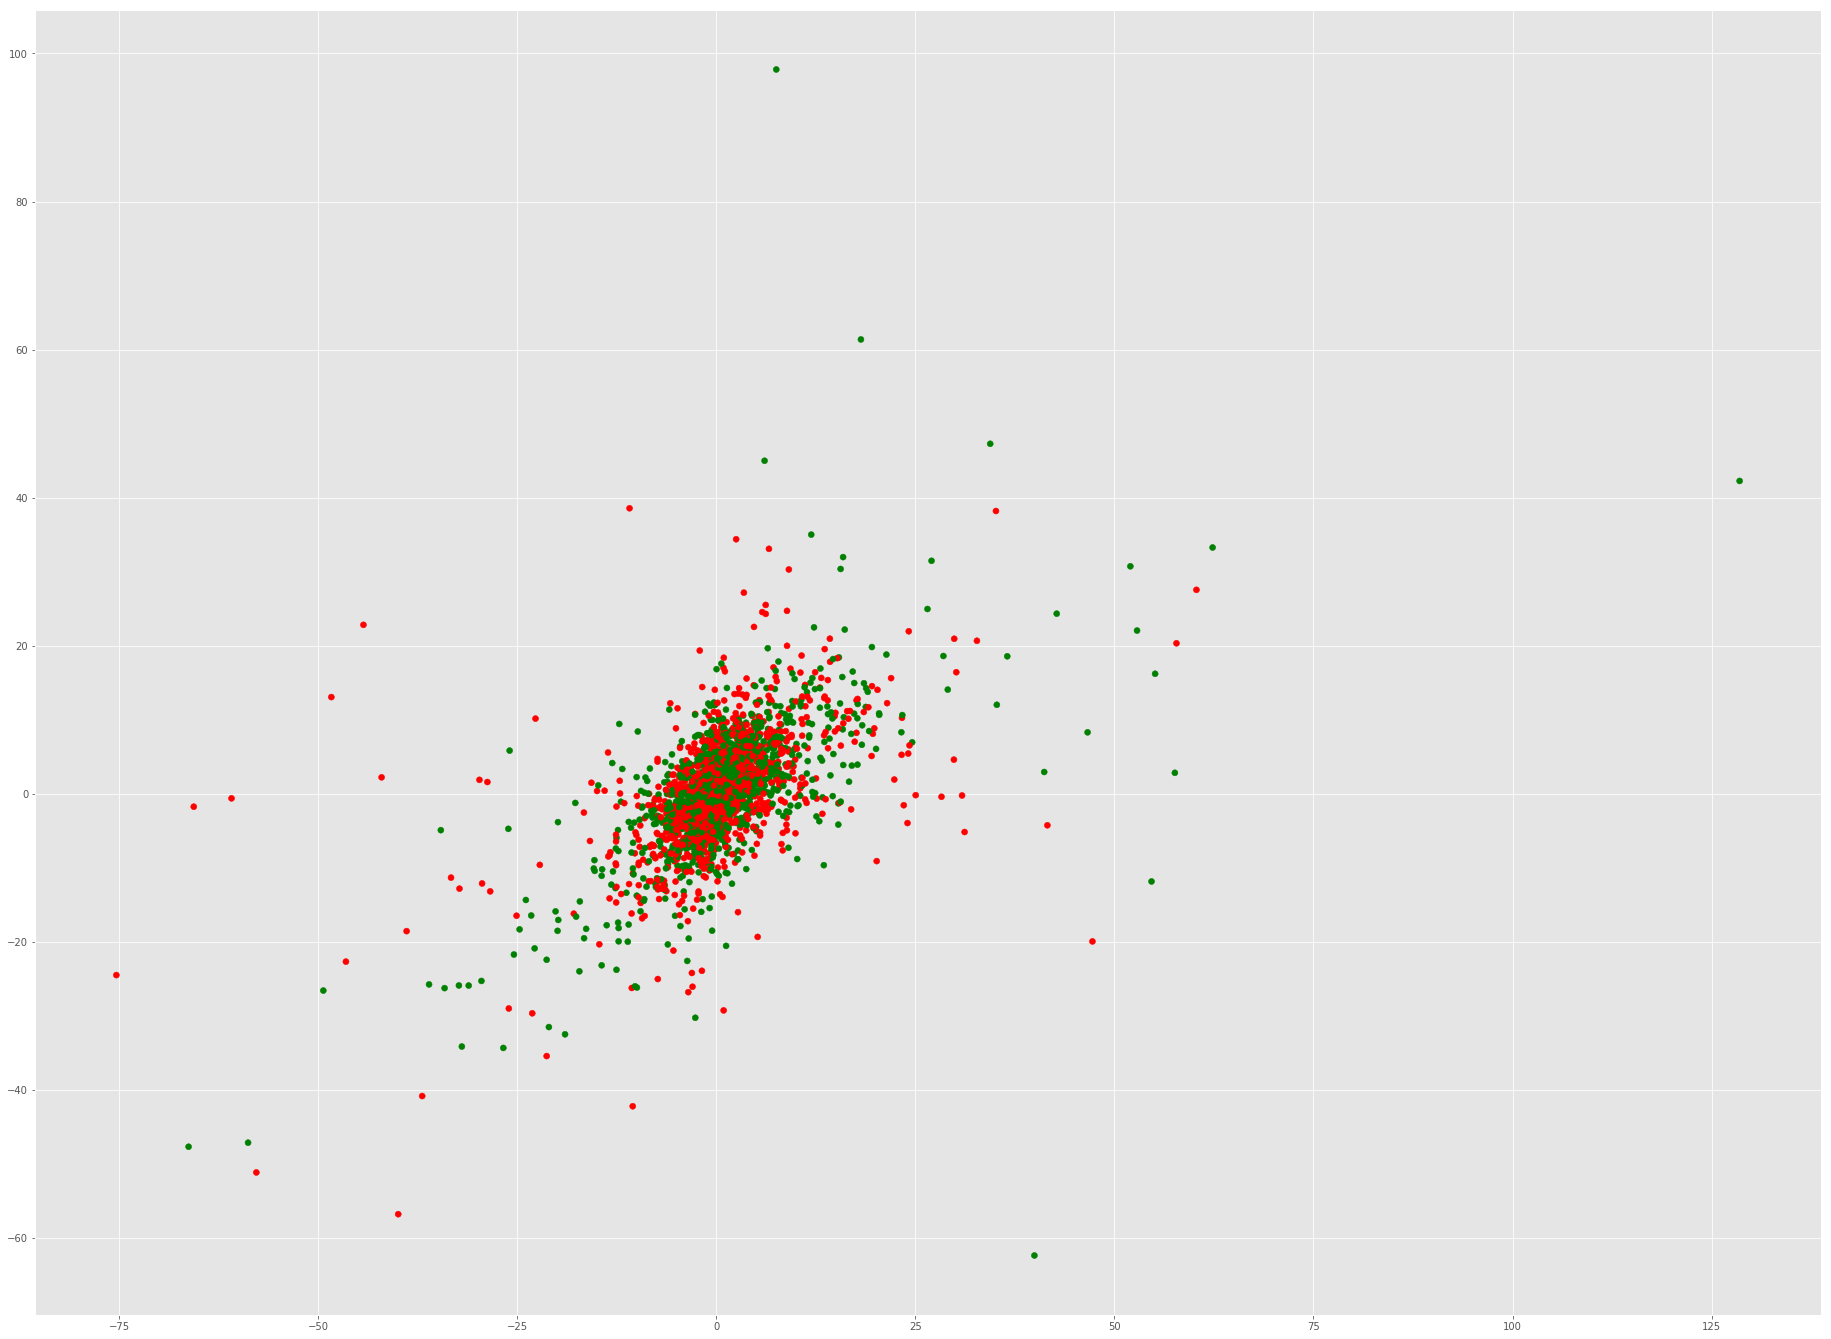

In [210]:
price1 = df1['PX_LAST'][df1['DATE']>start]
price2 = df2['PX_LAST'][df2['DATE']>start]
plt.scatter(price1.diff().dropna(),price2.diff().dropna(), c=('red','green'))
r1 = price1.pct_change().dropna()
r2 = price2.pct_change().dropna()
#plt.scatter(r1,r2, c=('red','green'))
log_r1 = [log(i+1) for i in r1]
log_r2 = [log(i+1) for i in r2]

In [211]:
#price isn't stationary, they have trend, so better to use returns that are more stationary 
print(pearsonr(price1,price2))
print("For ret-s : \n coefficient : %f , p-value %f " % pearsonr(r1, r2))


(0.95820701213756754, 0.0)
For ret-s : 
 coefficient : 0.452473 , p-value 0.000000 



Pearson correlation coefficient measures degree of linear dependence between two vectors. Mathematically it's covariance divided on product of standart deviations. 
Mathematically prices itself are almost perfectly linearly correlated, but prices can be unrelated, and measured correlation can be explained by common trend(stocks together moving upward).
Pearsons correlation coefficient varies from -1 to 1, so 0.45 means moderate positive linear relationship between two stocks returns and this relationship is statistically significant according to printed p-value.

# Task 4

In [212]:
price = df_selected["PX_HIGH"]

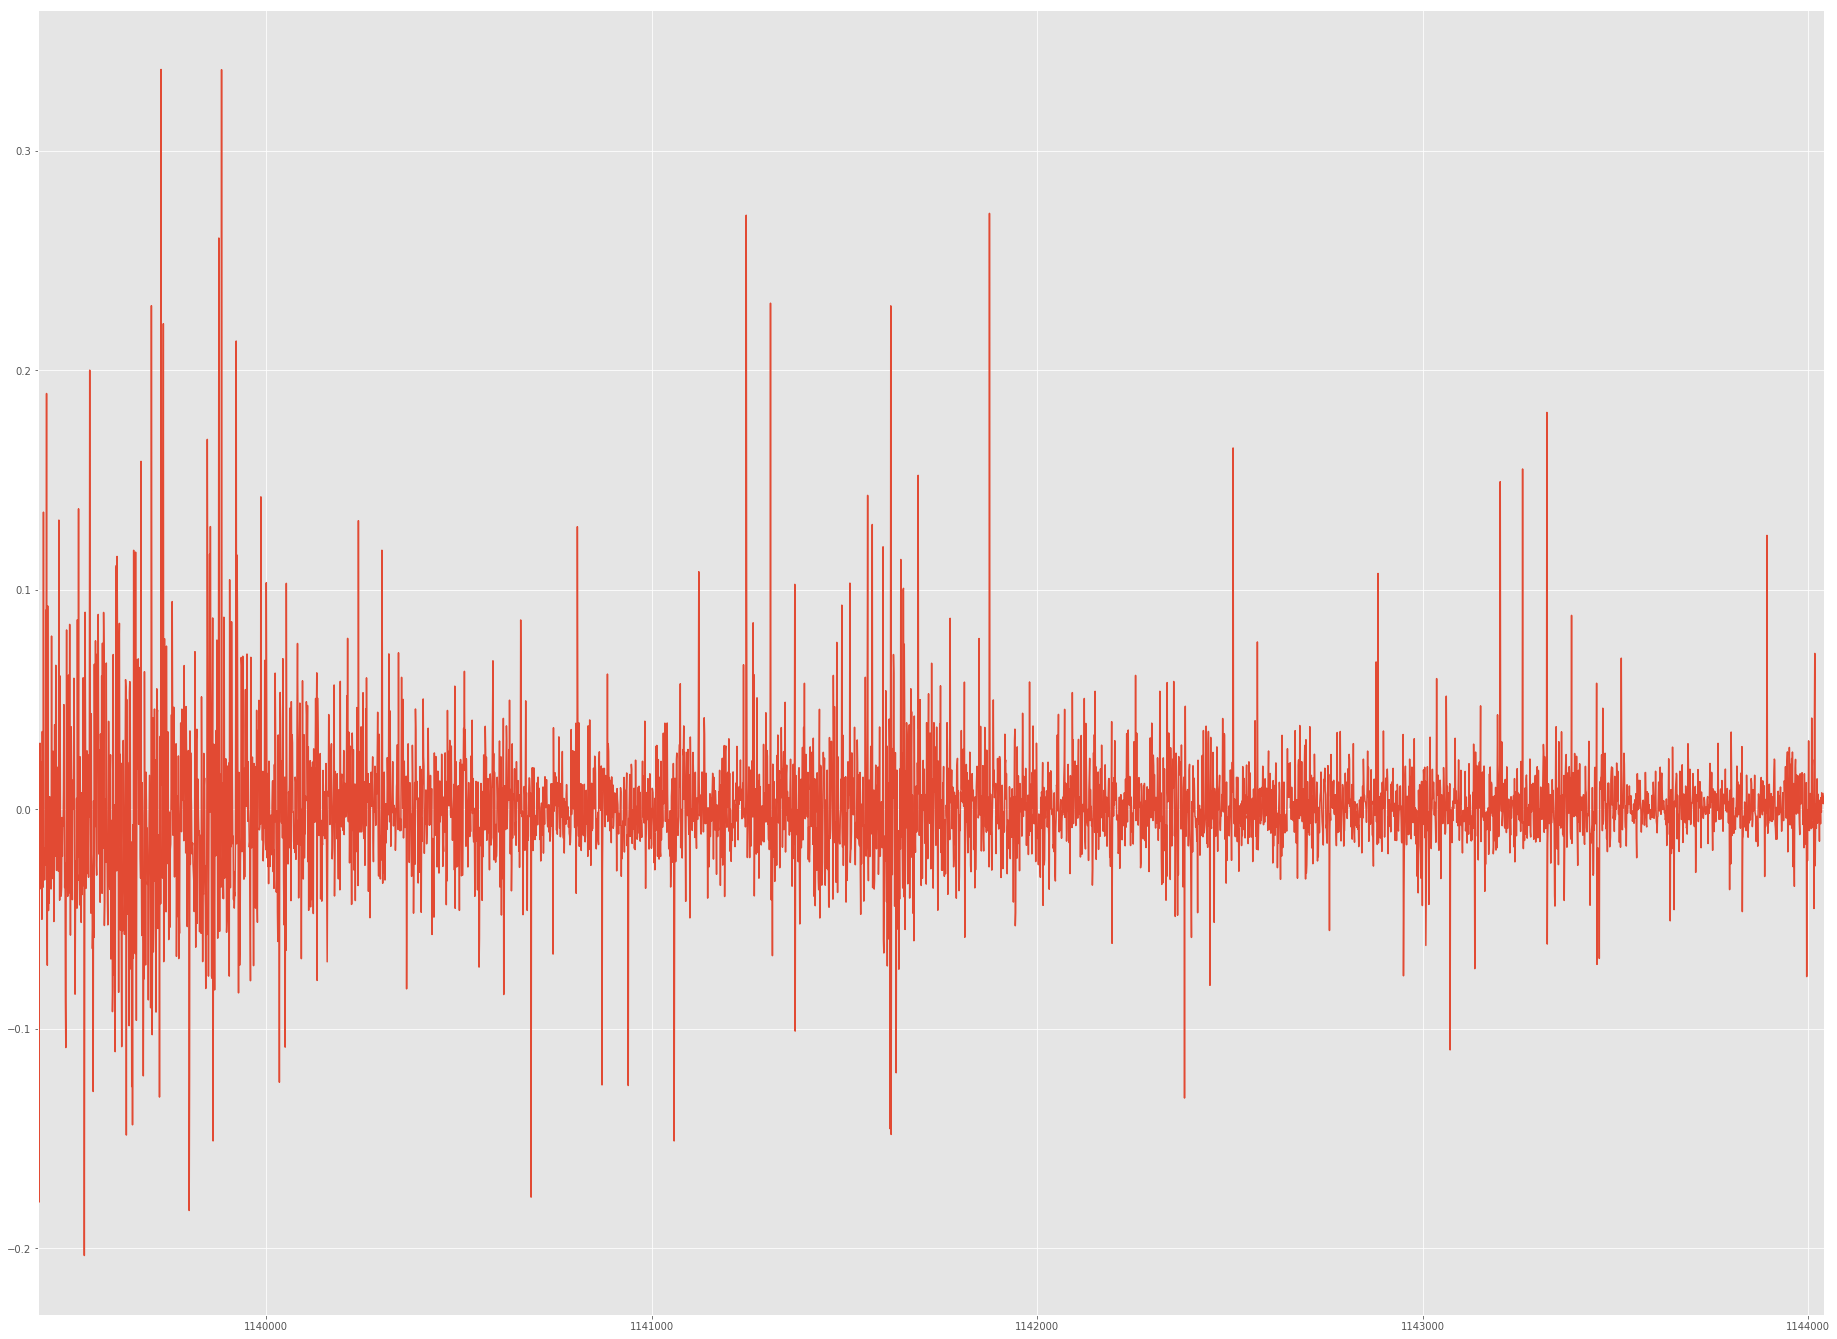

In [213]:
rets = price.pct_change(periods=1)
rets = rets.dropna()
rets.plot()

1139409    0.021627
1139410   -0.178962
1139411   -0.032439
1139412   -0.030101
1139413    0.030142
Name: PX_HIGH, dtype: float64 1139409    0.021397
1139410   -0.197186
1139411   -0.032977
1139412   -0.030564
1139413    0.029697
Name: PX_HIGH, dtype: float64


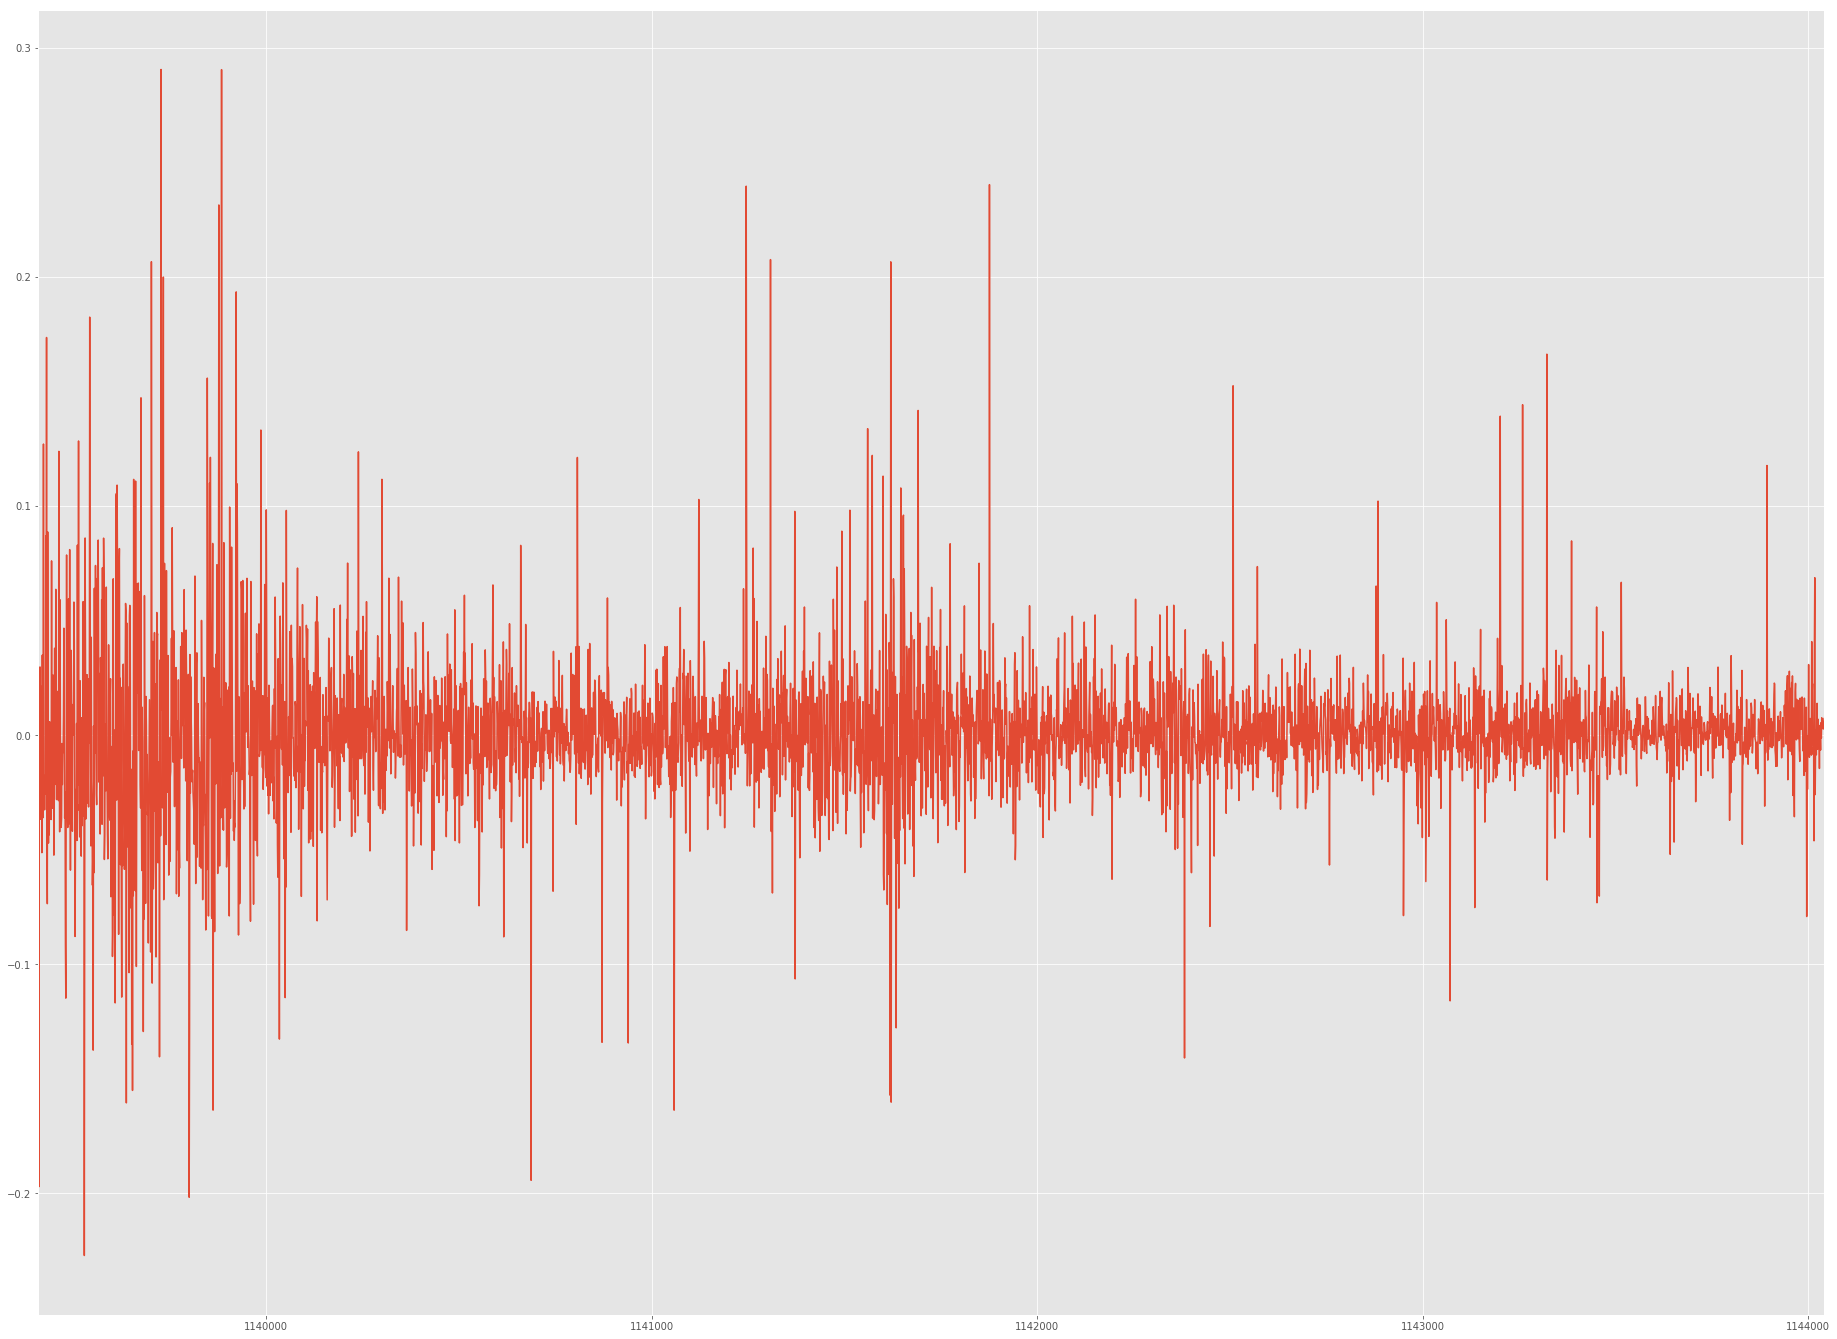

In [214]:
log_rets = rets.apply(lambda x: log(x+1))
log_rets.plot()
print(rets.head(),log_rets.head())

So one-day returns and logariphmic one-day returns don't differ significantly, because it's only one-day returns, and absolute values of returns aren't big. Log returns are always smaller. Even more, if returns are very small, using teylors formula we can approximate:
\begin{align} r_{ln} = ln(1+r) \approx r, if \ r \ll 1 \end{align}
The differences between returns r and log returns r_ln grow with the length of the period over which they are calculated.
Perfect analogy is behavior of exponenetial function while argument is in range from 0 to 1, and when bigger than 1. \begin{equation*} r = e^{r_{ln}} - 1 \end{equation*}

# Task 5

In [215]:
matplotlib.rcParams['figure.figsize'] = (32.0, 24.0)
matplotlib.style.use('ggplot')
df_selected = df[df['SECURITY'] == selected_security]
price = df_selected["PX_HIGH"]
rets = price.pct_change(periods=1)
rets = rets.dropna()




In [216]:
kurtosis = st.kurtosis(rets)
print(kurtosis)
print(st.skew(rets))

18.740331683713045
1.5969786391092808


Distribution is leptocurtic because curtosis is big positive number.
Kurtosis of normal distribution is 3 so this distribution isn't normal and has longer tails.
A long tail of the distribution means that the infinitely decreasing part of the distribution isn't effectively short, a large number of outliers, values diverge from mean.
According to this distribution with long tails, extreme events are much more likely. Moreover it's confirmed by a real fact. For example crysis on makret would never be predicted by normal distribution or any "short-tailed" distribution - these events are just impossible (e.g. probability 10^-20).


### Now I iterate by all existed(in scipy.stats package) distributions and find distribution of returns that has minimal sse(error sum of squares) with data. 

In [217]:
def best_fit_distribution(data, bins=500, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.johnsonsb,st.johnsonsu, st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf
    normal_sse = 0
    #dct = {}
    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if distribution == st.norm:
                    norm_sse = sse
                #dct[distribution] = sse
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass
    #print(best_sse, norm_sse)
    
    return (best_distribution.name, best_params)

In [218]:
# Create models from data
def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf


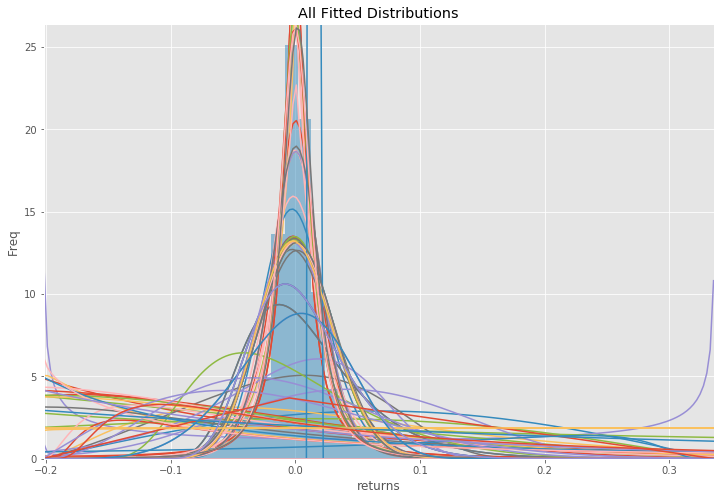

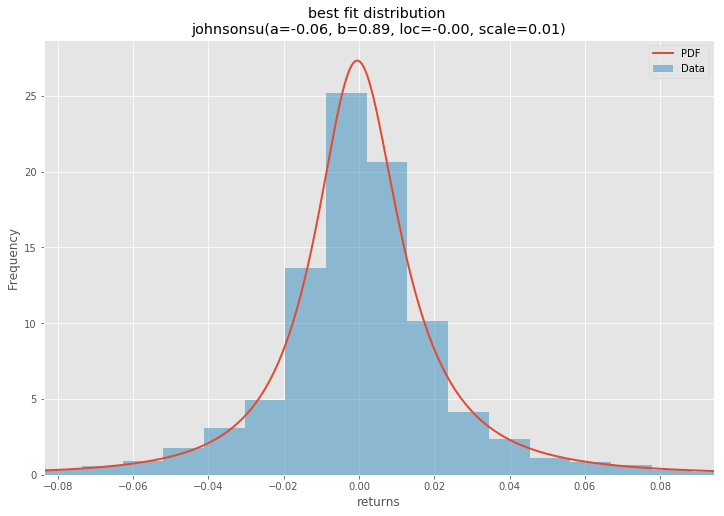

In [219]:
rets.index = [i for i in range(0,len(rets))]
data = rets

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, normed=True, alpha=0.5, color=plt.rcParams['axes.color_cycle'][1])
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params= best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title('All Fitted Distributions')
ax.set_xlabel('returns')
ax.set_ylabel('Freq')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params,size = len(rets))

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title('best fit distribution \n' + dist_str)
ax.set_xlabel('returns')
ax.set_ylabel('Frequency')

Su it's kind of johnson distribution with unbounded tails.

# Task 6

I use geometric brownian motion model to simulate the price movement of selected security.

In [220]:
df_selected['returns'] = df_selected['PX_LAST'].pct_change().dropna()
df_selected['prices'] = df_selected['PX_LAST']

In [221]:
def GBM(num_sims, predicted_days, returns, prices):

        last_price = prices.iloc[-1]
        
        sim_df = pd.DataFrame()
        
        
        for x in range(num_sims):
            if x%5000==0:
                print(x)
            #start values
            count = 0
            avg_daily_ret = returns.mean()
            variance = returns.var()
            daily_vol = returns.std()
            drift = avg_daily_ret - (variance/2)
            #start price   
            prices = []
        
            shock = drift + daily_vol * np.random.normal()
            prices.append(last_price * math.exp(shock))
            
            for i in range(predicted_days):
                shock = drift + daily_vol * np.random.normal()
                price = prices[count] * math.exp(shock)
                prices.append(price)
                
        
                count += 1
            sim_df[x] = prices
        return sim_df

In [222]:
sim_df = GBM(num_sims=100000, predicted_days=20, returns=df_selected['returns'], prices=df_selected['prices'] )

0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000


In [223]:
def VaR(s_df, prices,var_l=95):
        sim_df = s_df
 
        last_price = prices.iloc[-1]
        print(last_price)
        
        price_array = sim_df.iloc[-1, :]
        price_array = sorted(price_array, key=int)  
        var =  np.percentile(price_array, 100-var_l)
        
        val_at_risk = last_price - var
        print ("absolute Value at Risk: ", val_at_risk)
        
        #Histogram
        fit = norm.pdf(price_array, np.mean(price_array), np.std(price_array))
        plt.plot(price_array,fit,'-o')
        plt.hist(price_array,normed=True)
        plt.xlabel('Price')
        plt.ylabel('Probability')
        plt.title(r'Histogram of speculated stock prices', fontsize=18, fontweight='bold')
        plt.axvline(x=var, color='r', linestyle='--', label='Price at confidence interval: ' + str(round(var, 2)))
        plt.axvline(x=last_price, color='k', linestyle='--', label = 'current stock price: ' + str(round(last_price, 2)))
        plt.legend(loc="upper right")
        plt.show()
        return val_at_risk

1641.54
absolute Value at Risk:  352.978725073


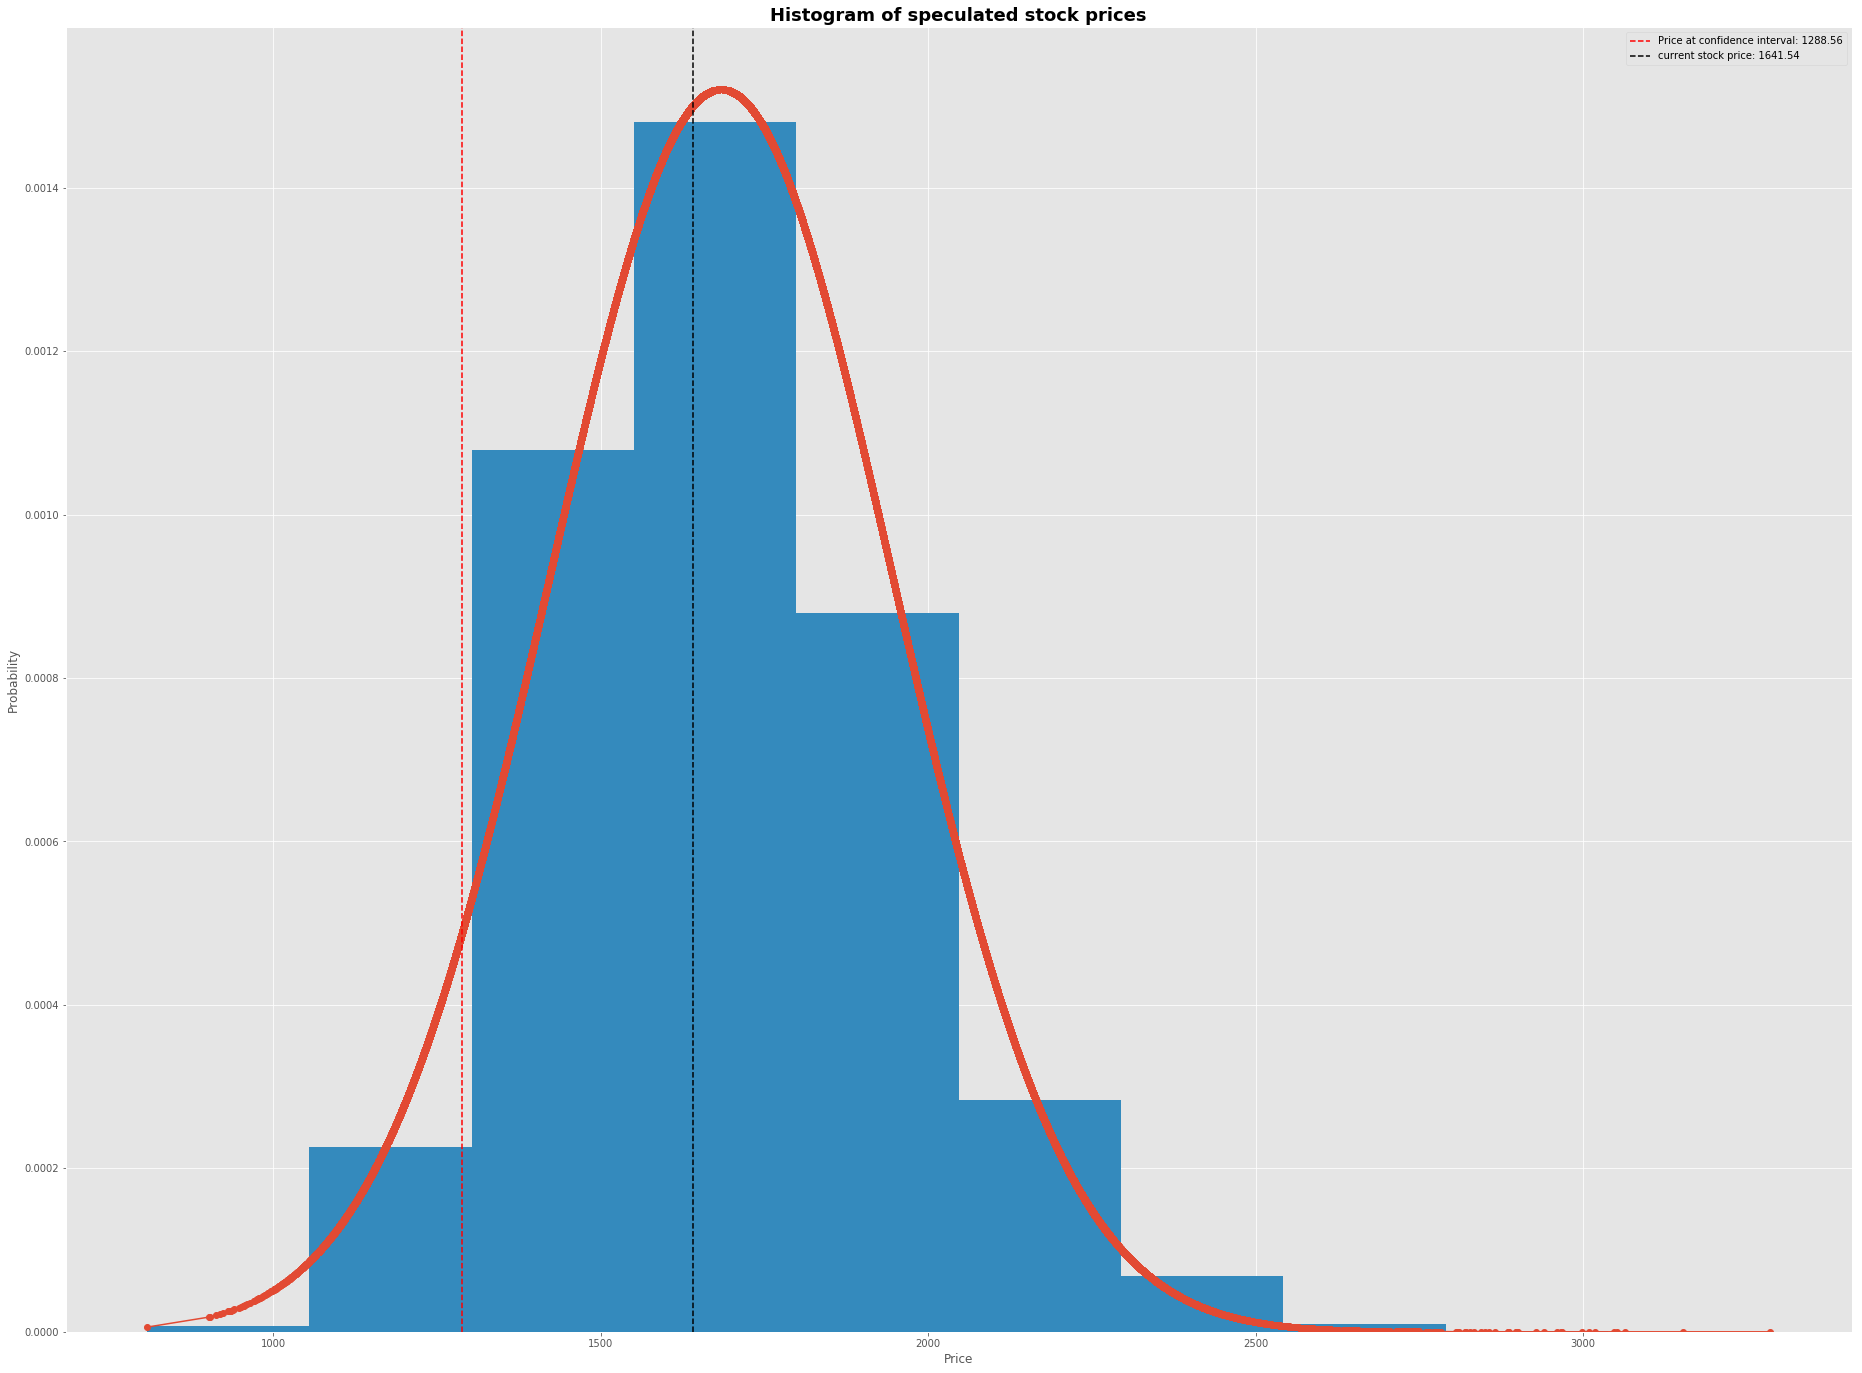

In [224]:
var = VaR(s_df=sim_df, prices=df_selected['prices'])

Interpretation: 
\begin{equation*} P(price \ decrease  \geq VaR) \leq 1 - \alpha \end{equation*}
In our case alpha is .95
If we would simulate portfolio value in same way, we could say that probability of our losses will exceed VaR <= 1-alpha.